In [0]:
'''
  Média: variáveis numéricas. Todos os valores a afetam.

  Mediana

  Moda: valor mais frequente
    values_count é a moda
    bom pra variáveis ordinais e nominais ou valores numericos discretos
    Casos especiais:
      Sem moda: repetições iguais
      Multimodal: Vários picos e valores que não são também
      Bimodal: 2 modas
  Notas de avaliação em geral: padrão bimodal
'''

'\n  Média: variáveis numéricas. Todos os valores a afetam.\n\n  Mediana\n\n  Moda: valor mais frequente\n    values_count é a moda\n    bom pra variáveis ordinais e nominais ou valores numericos discretos\n    Casos especiais:\n      Sem moda: repetições iguais\n      Multimodal: Vários picos e valores que não são também\n      Bimodal: 2 modas\n  Notas de avaliação em geral: padrão bimodal\n'

# 1 - Introduction

We learned that the **mean** takes into account each value in the distribution, and we saw that it's fairly **easy to define the mean algebraically**. These two properties make the mean far superior to the median. The **median comes in handy**, however, **when it's not possible or appropriate to compute the mean**.

In this mission we'll explore a couple of cases where neither the **mean** nor the **median** are suitable for finding an average value, and we'll learn an alternative summary metric.

We'll still be working with the same data set on house sale prices that we used in the last two missions:

| | Order | PID | MS SubClass | MS Zoning | Lot Frontage | Lot Area | Street | Alley | Lot Shape | Sale Condition | SalePrice |        
|-------|-----|-------------|-----------|--------------|----------|--------|-------|-----------|----------------|-----------|--------|
| 0     | 1   | 526301100   | 20        | RL           | 141.0    | 131770 | Pave  | NaN       | WD             | Normal    | 215000 |
| 1     | 2   | 526350040   | 20        | RH           | 80.0     | 11622  | Pave  | NaN       | WD             | Normal    | 105000 |
| 2     | 3   | 526351010   | 20        | RL           | 81.0     | 14267  | Pave  | NaN       | WD             | Normal    | 172000 |
| 3     | 4   | 526353030   | 20        | RL           | 93.0     | 11160  | Pave  | NaN       | WD             | Normal    | 244000 |
| 4     | 5   | 527105010   | 60        | RL           | 74.0     | 13830  | Pave  | NaN       | WD             | Normal    | 189900 |


Let's get familiar with a few parts of the data set which we're going to explore in this mission.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Read in the TSV file (**AmesHousing_1.txt**) as a pandas **DataFrame** and save it to a variable named **houses.**
- Explore the **Land Slope** column to find its scale of measurement. Refer to the [documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt) to find the data dictionary of this column.
  - Assign your answer as a string to the variable **scale_land**. Depending on the scale of measurement, choose between these following strings: **'nominal'**, **'ordinal'**, **'interval'**, and **'ratio'**.
- Explore the **Roof Style** variable and find its scale of measurement. Assign your answer as a string to a variable named **scale_roof** (choose between the four strings listed above).
  - What measure of average would you choose for this column?
- Explore the **Kitchen AbvGr** variable and determine whether it's continuous or discrete. Assign your answer as a string to a variable named **kitchen_variable** — the string should be either **'continuous'**, or **'discrete'**.


In [0]:
# put your code here
import pandas as pd
houses = pd.read_csv("AmesHousing_1.txt", sep="\t")

# print(houses["Land Slope"])
scale_land = "ordinal"

# print(houses["Roof Style"])
scale_roof = "nominal"

# print(houses["Kitchen AbvGr"])
kitchen_variable = "discrete"

# 2 - The Mode for Ordinal Variables

In the last exercise, we found that the **Land Slope** variable is **ordinal**. You may have also found from your exploration that the values of this variable are represented using words:

In [0]:
houses["Land Slope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

As you may have already found in the [documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), **'Gtl'** means gentle slope, **'Mod'** means moderate slope, and **'Sev'** stands for 'Severe slope'.

**We can't compute the mean** for this variable because its values are words, not numbers. Remember that the definition of the mean is $\displaystyle \frac{\sum_{i=1}^{n}}{n}$, so we can't compute the $\displaystyle \sum_{i=1}^{n} x_i$  part if the values are words. We learned previously that the **median** is a good workaround for **ordinal data**, but the values of this ordinal variable are not numbers. Can we still compute the **median**?

If we sort the values of the **Land Slope** variable, we can find that the middle two values are **['Gtl', 'Gtl']** (the variable has an even number of values). Although we can't take their mean, it's intuitively clear that the average of two identical values is one of those values, so the **median** value should be **'Gtl'**.

However, if the two middle values were **['Gtl', 'Mod']**, then it wouldn't be clear at all what to choose for the **median**. In cases like this, one workaround for finding an average value is to measure the most frequent value in the distribution. For the **Land Slope** variable, we can see that the value **'Gtl'** has the greatest frequency:




In [0]:
houses['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

We call the most frequent value in the distribution **the mode**. So the mode of the **Land Slope** variable is **'Gtl'**. In other words, the typical house has a **gentle slope**. Very importantly, notice that the mode is the most frequent value in the distribution, not the frequency of that value — so **the mode is 'Gtl', not 2789**.

Just like for the **median**, there's no standard notation for the **mode**. It's also worth noting that the **mode is not defined algebraically.**

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Write a function that takes in an array of values (including strings) and returns the **mode** of that array. Inside the function's definition:
  - Initialize an empty dictionary.
  - Loop through the values of the array that the function takes in. For each iteration of the loop:
    - If the value is already a key in the dictionary we initialized before the loop, increment its dictionary value by 1.
    - Else, define the value as a key in the dictionary, and set the initial dictionary value to 1.
  - You should end up with a dictionary containing the unique values of the array as dictionary keys and the count for each unique value as a dictionary value: **example_dictionary = {'unique_value1': 230, 'unique_value2': 23, 'unique_value3': 328}.**
  - Return the key with the highest count (this key is the mode of the array). For instance, for the **example_dictionary** above, you should return the string **unique_value3.**
    - You can use this [technique](https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary/280156#280156) to return the key corresponding to the highest value.
- Using the function you wrote, measure the **mode** of the **Land Slope** variable, and assign the result to a variable named **mode_function.**
- Using the **Series.mode()** method, measure the **mode** of the **Land Slope** variable, and assign the result to a variable named **mode_method.**
- Compare the two modes using the == operator to check whether they are the same and assign the result of the comparison to a variable named **same.**



In [0]:
# put your code here
array = [3, 1, 2, 3, 4, 5,]
def get_mode(array):
  dictionary = {}
  greatest = -1000
  for i in array:
    if i in dictionary:
      dictionary[i] += 1
      if(dictionary[i] > greatest):
        greatest = dictionary[i]
        key_greatest = i
    else:
      dictionary[i] = 1
  return key_greatest
mode = get_mode(array)
print(" Expected mode of my array: 3\n", "Mode of my array: ", mode)

mode_function = get_mode(houses["Land Slope"])
mode_method = houses["Land Slope"].mode()
same = (mode_function == mode_method)

 Expected mode of my array: 3
 Mode of my array:  3


# 3 - The Mode for Nominal Variables

In the previous section, we learned that the **mode** is **ideal for ordinal data** represented **using words**. The mode is also a good choice for nominal data. Let's consider the **Roof Style** variable, which is measured on a **nominal scale** and describes the roof type of a house:

In [0]:
houses['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

We obviously can't compute the **mean** for this variable because the **values are words**. Even if they were coded as numbers, it'd be completely wrong to compute the mean because in the case of nominal variables the numbers describe qualities, not quantities.

In the previous section, we made the case that we could compute the **mean** for **ordinal variables** if the values are numbers. This reasoning doesn't extend to nominal variables because they don't describe quantities, like ordinal variables do.


<img width="400" src="https://drive.google.com/uc?export=view&id=1exMTxyLhkc-9Ov_2nv9J3KbEUX64FJEd">

Because the **Roof Style** variable is **nominal**, there's also no inherent order of the values in the distribution. This means that we can't sort the values in an ascending or descending order. The first step in computing the **median** is to sort the values in ascending order, which means **we can't compute the median** for the **Roof Style** variable.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Edit the function you wrote to return both the **mode** of an array and the dictionary containing the count for each unique value in the array.
- Use the edited function to return, at the same time, the mode of the **Roof Style** variable and the dictionary containing the counts for each unique value.
  - Assign the mode to a variable named **'mode'.**
  - Assign the dictionary to a variable named **value_counts.**
- Inspect the content of **value_counts** and compare it to the value count we'd get by using the **Series.value_counts()** method.
  - This exercise is meant to give you a better understanding of what happens under the hood when we run **Series.value_counts().**

In [0]:
def get_mode(array):
  dictionary = {}
  greatest = -1000
  for i in array:
    if i in dictionary:
      dictionary[i] += 1
      if(dictionary[i] > greatest):
        greatest = dictionary[i]
        key_greatest = i
    else:
      dictionary[i] = 1
  return key_greatest, greatest
  
mode = get_mode(houses["Roof Style"])[0]
print("My mode(): ", mode)
value_counts = get_mode(houses["Roof Style"])[1]
print("My value_counts(): ", value_counts)

print("\n", houses["Roof Style"].value_counts())

My mode():  Gable
My value_counts():  2321

 Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64


# 4 - The Mode for Discrete Variables

There are some cases where computing the **mean** and the **median** is possible and correct, but the **mode** is preferred nonetheless. **This is sometimes the case for discrete variables.**

To remind you from the first course, variables measured on interval or ratio scales can also be classified as **discrete** or **continuous**. A variable is discrete if there's no possible intermediate value between any two adjacent values. Let's take for instance the **Kitchen AbvGr** variable, which describes the number of kitchens in a house:

In [0]:
houses['Kitchen AbvGr'].value_counts().sort_index()

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64

Let's say we need to write an article about the house market in Ames, Iowa, and our main target audience are regular adult citizens from Ames. Among other aspects, we want to describe how many kitchens the typical house has. If we take the mean, we'd need to write that the typical house has 1.04 kitchens. This wouldn't make much sense for the regular reader, who expects the number of kitchens to be a whole number, not a decimal.

The median is 1 — a value much easier to grasp by non-technical people compared to 1.04. But this is a lucky case because the middle two values in the sorted distribution could have been [1,2], and then the median would have been 1.5. The mode is a safer choice for cases like this because it guarantees a whole number from the distribution.

The mode of the **Kitchen AbvGr** variable is 1. When we report this result, we should avoid technical jargon (like "mode" or "variable") and simply say that the typical house on the market has one kitchen.

<img width="400" src="https://drive.google.com/uc?export=view&id=1sPDIyyNZE9VTMSEu-eW0-VtgPhQCSklk">

Note that the **mode** is also guaranteed to be a value from the distribution (this holds true for any kind of variable). This doesn't apply to the **mean** or the **median**, which can return values that are not present in the actual distribution. For instance, the **mean** of the **Kitchen AbvGr** is 1.04, but the value 1.04 is not present in the distribution.

The **mean** and the **median** generally summarize the distribution of a discrete variable much better than the **mode**, and you should use the **mode** only if you need to communicate your results to a non-technical audience.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Explore the **Bedroom AbvGr** variable, and find whether it's **discrete** or **continuous**. You can refer to the [documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt) for the possible values for this column.
  - If it's **discrete**, assign the string **'discrete'** to a variable named **bedroom_variable**, otherwise assign **'continuous'**.
  - If it's **discrete**, compute its mode using **Series.mode()** and assign the result to a variable named **bedroom_mode.**
- Find whether the **SalePrice** variable is **discrete** or **continuous**.
  - If it's **discrete**, assign the string **'discrete'** to a variable named **price_variable**, otherwise assign **'continuous'.**
  - If it's **discrete**, compute its mode using **Series.mode()** and assign the result to a variable named **price_mode**.

In [0]:
# put your code here
bedroom = houses["Bedroom AbvGr"]
bedroom_variable = "discrete"
bedroom_mode = bedroom.mode()
print(bedroom_mode)

sale_price = houses["SalePrice"]
price_variable = "discrete"
price_mode = sale_price.mode()
print(price_mode)

0    3
dtype: int64
0    135000
dtype: int64


# 5 - Special Cases

There are distributions that can have more than one **mode**. Let's say we sampled the **Kitchen AbvGr** column and got this distribution of seven sample points:

$$
[0,1,1,1,2,2,2,3]
$$

The two most frequent values are 1 and 2 (both occur in the distribution three times), which means that this distribution has **two modes** (1 and 2). For this reason, we call this distribution **bimodal** (the prefix "bi-" means "twice"). If the distribution had only one mode, we'd call it **unimodal** (the prefix "uni-" means "only one").

There's nothing wrong with having two modes. For our case above, the two modes tell us that the typical house on the market has either one or two kitchens.

It's not excluded to have a distribution with more than two modes. Let's say we sampled from another column, **Bedroom AbvGr**, and got this distribution of 10 sample points:

$$
[0,1,1,2,2,3,3,4,4,8]
$$

Note that this distribution has four modes: 1, 2, 3, and 4 (each occurs twice in the distribution). When a distribution has more than two modes, we say that the distribution is **multimodal** (the prefix "multi-" means many).

We can also have cases when there is no mode at all. Let's say we sample again from the **Bedroom AbvGr** column and get this distribution of 8 sample points:

$$
[1,1,2,2,3,3,4,4]
$$

Each unique value occurs twice in the distribution above, so there's no value (or values) that occurs more often than others. For this reason, **this distribution doesn't have a mode**. Contextually, we could say that there's no typical house on the market with respect to the number of bedrooms.

**Distributions without a mode are often specific to continuous variables**. It's quite rare to find two identical values in a continuous distribution (especially if we have decimal numbers), so the frequency of each unique value is usually 1. Even if we find identical values, their frequency is very likely to be too low to produce a meaningful mode value.

The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with the highest frequency. This method has its limitations, but it generally gives reasonable answers. Let's try to get a better grasp of how this works in the following exercise.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Using only what we learned in the previous lessons, we already created a grouped frequency table for the **SalePrice** variable (in the cell below).
```python
(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
```
- Find the class interval with the highest frequency, then find its midpoint. For instance, the midpoint of the class interval **(0, 100000]** is 50000.
  - Assign the midpoint value to a variable named **mode**. Make sure the value you assign is of the **int** type.
- Find the **mean** of the **SalePrice** column and assign it to a variable named **mean**.
- Find the **median** of the **SalePrice** column and assign it to a variable named **median**.
- Asses the truth value of the following sentences:
  - The **mode** is lower than the **median**, and the **median** is lower than the **mean**.
    - If you think this is true, assign the boolean **True** to a variable named **sentence_1**, otherwise assign **False**.
  - The **mean** is greater than the **median**, and the **median** is greater than the **mode**.
    - Assign **True** or **False** to a variable named **sentence_2**.

In [0]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)


# put your code here
mode = (200000+100000)/2
mean = houses["SalePrice"].mean()
median = houses["SalePrice"].median()

sentence1 = True
sentence2 = True

print("\nMode: ", mode)
print("Mean: ", mean)
print("Median: ", median)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64

Mode:  150000.0
Mean:  180796.0600682594
Median:  160000.0


# 6 - Skewed Distributions

When we plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution. In the code below, we plot a kernel density plot to visualize the shape of the **SalePrice** variable and:

- Set the limits of the x-axis using the **xlim** parameter — the lowest limit is the minimum value in the **SalePrice** variable, and the upper limit is the maximum value.
- Plot a vertical line to indicate the position of the mode (note that our estimate of 150000 from the last exercise is quite close to the peak of the distribution).

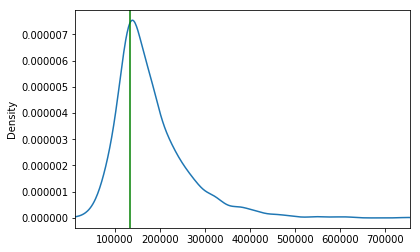

In [0]:
import matplotlib.pyplot as plt
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()))
plt.axvline(houses['SalePrice'].mode()[0], color = 'Green')
plt.show()

**This distribution is clearly right skewed**. Generally, the location of the mode, median and mean is predictable for a right-skewed distribution:

- Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.
- Remember that the median divides a distribution in two halves of equal length. For this reason, **the median is usually positioned slightly right from the peak** (the mode) for a right-skewed distribution.
- The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull **the mean to the right of the median**.

So in a **right-skewed distribution**, the mean will usually be to the right of the median, and the median will be to the right of the mode. This holds true for the distribution of the **SalePrice** variable:





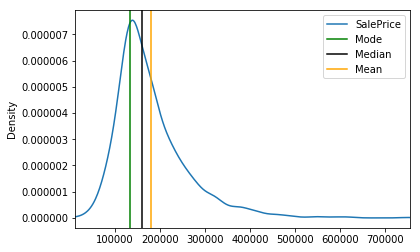

In [0]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    ))
plt.axvline(houses['SalePrice'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

For a **left-skewed distribution**, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode. This is obvious on the distribution of the **Year Built** variable:



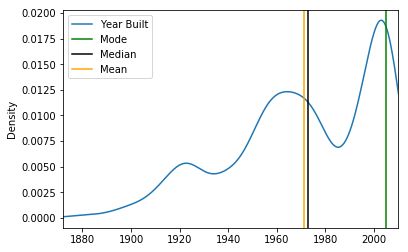

In [0]:
houses['Year Built'].plot.kde(xlim = (houses['Year Built'].min(),
                                             houses['Year Built'].max()))
plt.axvline(houses['Year Built'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- In the code editor you can see the mean, mode and median for three distributions. Indicate whether the mean, median, and mode of each distribution suggest a left or a right skew.
  - If the values for **distribution_1** indicate a **right skew**, assign the string **'right skew'** to a variable named **shape_1**, otherwise assign **'left skew'**.
  - If the values for **distribution_2** indicate a **right skew**, assign the string **'right skew'** to a variable named **shape_2**, otherwise assign **'left skew'**.
  - If the values for **distribution_3** indicate a **right skew**, assign the string **'right skew'** to a variable named **shape_3**, otherwise assign **'left skew'**.


In [0]:
distribution_1 = {'mean': 3021 , 'median': 3001, 'mode': 2947}
distribution_2 = {'median': 924 , 'mode': 832, 'mean': 962}
distribution_3 = {'mode': 202, 'mean': 143, 'median': 199}

# put your code here
distribution_1 = "right skew"
distribution_2 = "right skew"
distribution_3 = "left skew"

# 7 - Symmetrical Distributions

The location of the **mean**, **median**, and **mode** are also predictable for **symmetrical distributions**. Remember from the last course that if the shape of a distribution is symmetrical, then we can divide the distribution in two halves that are mirror images of one another:

<img width="400" src="https://drive.google.com/uc?export=view&id=1LoXkwVmlC_KarBDPXHE2st2fyMF0zMJ_">


The median divides the distribution in two equal halves. As a consequence, the median will always be at the center of a perfectly symmetrical distribution because only a line drawn at the center can divide the distribution in two equal halves.

For a perfectly symmetrical distribution, the two equal halves will bear the same weight when computing the mean because the mean takes into account equally each value in the distribution. The mean is not pulled neither to the left, nor to the right, and stays instead in the center, at the same location as the median. **The mean and the median are always equal for any perfectly symmetrical distribution**.

Although the mean and the median have a constant location for every symmetrical distribution (no matter the shape), the location of the mode can change. The mode is where the peak is, so for a normal distribution the mode will be at the center, right where the mean and the median are.

<img width="400" src="https://drive.google.com/uc?export=view&id=1MSgsaDT60_2mB9wlyva719AMlTBzHIXd">


It's possible to have a symmetrical distribution with more than one peak, which means that the mode won't be at the center:

<img width="400" src="https://drive.google.com/uc?export=view&id=1IK5Js2kzVSnQm29QHTUyZjXSNIs-N0DV">

A uniform distribution doesn't have any peaks, which means it doesn't have any mode:

<img width="400" src="https://drive.google.com/uc?export=view&id=1JhmtH9MOvBn02ZJSY3foWDyadwbEChJ_">

In practice, we almost never work with perfectly symmetrical distributions, but many distributions are approximately symmetrical nonetheless. This means that the patterns outlined above are still relevant for practical purposes.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- The distribution of the **Mo Sold** variable (which describes the month of a sale) is close to normal.
  - Plot a kernel density plot for this distribution using **Series.plot.kde().**
  - The lower boundary of the x-axis should be 1 and the upper one 12. You can use the **xlim** parameter of the **Series.plot.kde()** method.
  - Plot three vertical lines:
    - One for the **mode** — the color of the line should be **green** and its label should be **'Mode'**.
    - One for the **median** — the color of the line should be **orange** and its label should be **'Median'**.
    - One for the **mean** — the color of the line should be **black** and its label should be **'Mean'**.
  - Display all the labels using a **legend** (you can activate the legend using **plt.legend()**.
- You should observe the **mean**, the **median**, and the **mode** clustered together in the center of the distribution.

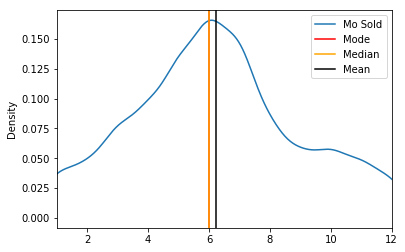

In [0]:
# put your code here
fig, ax = plt.subplots()
houses["Mo Sold"].plot.kde(xlim=(1,12))
ax.axvline(houses["Mo Sold"].mode()[0], color="red", label="Mode")
ax.axvline(houses["Mo Sold"].median(), color="orange", label="Median")
ax.axvline(houses["Mo Sold"].mean(), color="black", label="Mean")
plt.legend()
plt.show()

# 8 - Next Steps

In this lesson, we learned that the **mode** is ideal for summarizing:

- Ordinal data represented using words.
- Nominal data.
- Discrete data (when the average value needs to be communicated to a non-technical audience).

We also saw that the position of the mean, median, and mode is generally predictable for skewed and symmetrical distributions.

Throughout the last three lessons we learned how to measure the average value of a distribution. In the table below, you can see a summary of what we learned so far.

<img width="600" src="https://drive.google.com/uc?export=view&id=1gF03wvv0MoiquAJ_-vlEoJ6-xh7GItLt">


Next in this course, we'll build on what we already know and learn how to measure the **variability** in a distribution.
